In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
df.shape

(10000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df.sample(5)

,Gender,Height,Weight
1333,Male,67.796214,184.862913
5350,Female,61.177983,121.327062
3092,Male,69.996663,196.507741
7364,Female,67.781282,162.155570
3414,Male,67.901515,173.915819


In [7]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [8]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

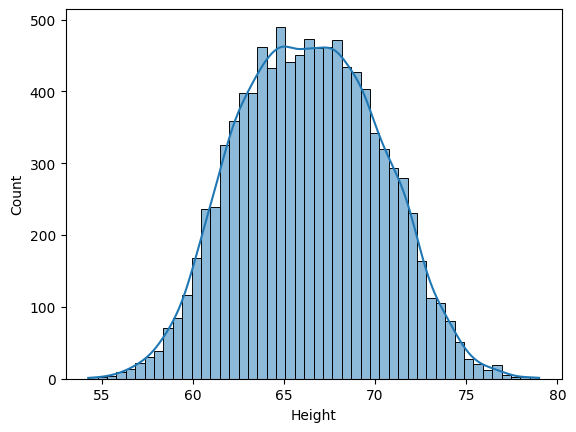

In [11]:
sns.histplot(df['Height'],kde=True)

<Axes: ylabel='Height'>

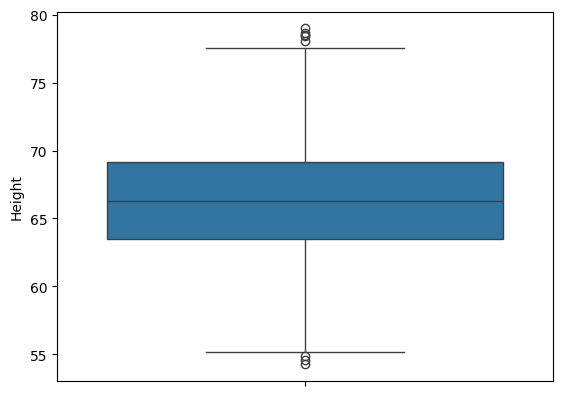

In [12]:
sns.boxplot(df['Height'])

In [13]:
upper_limit=df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [14]:
lower_limit=df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [15]:
new_df=df[(df['Height']<=74.78)&(df['Height']>=58.13)]

In [16]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [17]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

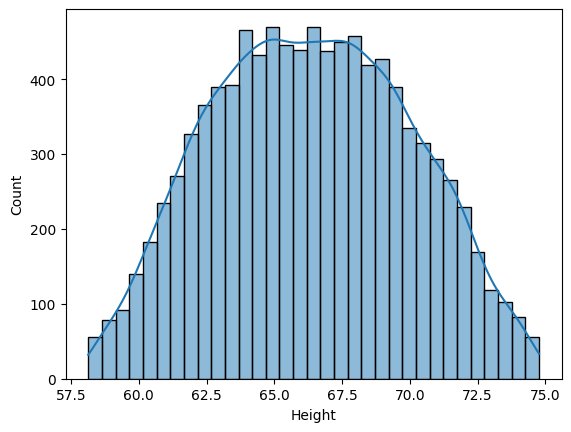

In [19]:
sns.histplot(new_df['Height'],kde=True)

<Axes: ylabel='Height'>

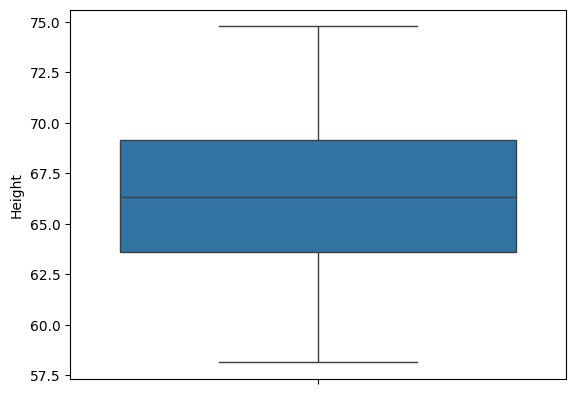

In [20]:
sns.boxplot(new_df['Height'])

In [21]:
#Capping--->Winsorization
df['Height']=np.where(df['Height']>=upper_limit,upper_limit,
                      np.where(df['Height']<=lower_limit,lower_limit,
                               df['Height']))

In [22]:
df.shape

(10000, 3)

In [23]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

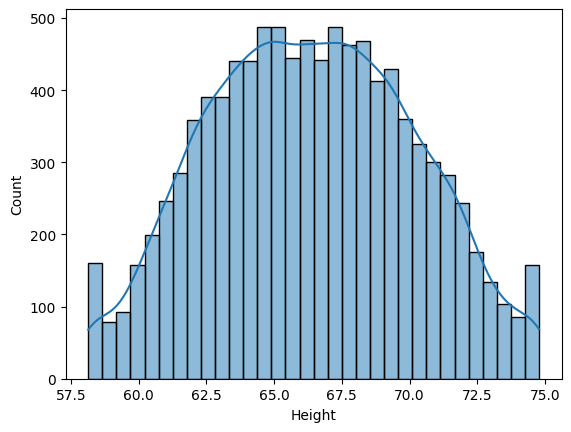

In [25]:
sns.histplot(df['Height'],kde=True)

<Axes: ylabel='Height'>

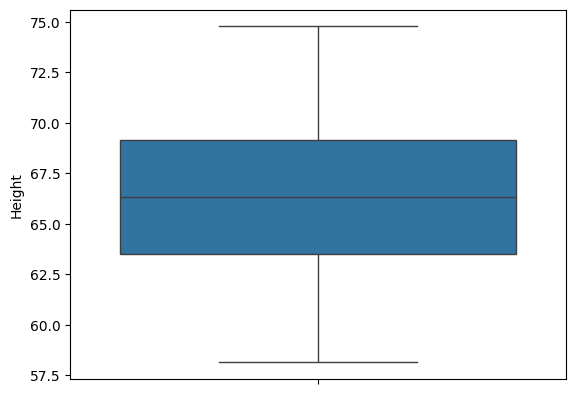

In [26]:
sns.boxplot(df['Height'])